#### import Libabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale

#### The Data

In [2]:
df=pd.read_csv("train.csv")
df.head()
dtale.show(df)

### EDA
#### Mssing Values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
pd.get_dummies(df.Embarked,prefix="Embarked")

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


<AxesSubplot:>

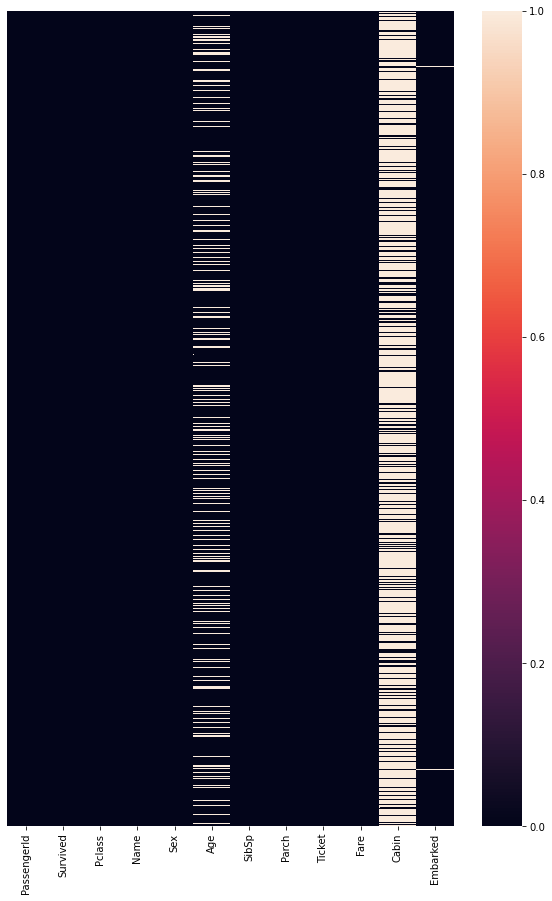

In [5]:
plt.figure(figsize=(10,15))
sns.heatmap(df.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

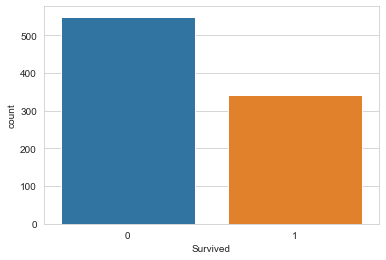

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

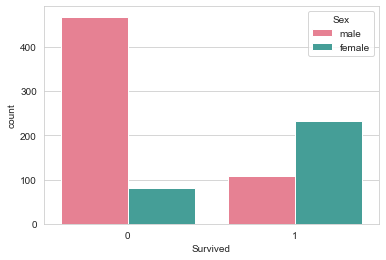

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df,palette="husl")

<AxesSubplot:xlabel='Survived', ylabel='count'>

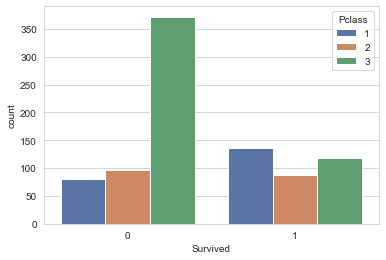

In [8]:
sns.set_style("whitegrid") # died passanger according class
sns.countplot(x="Survived",hue="Pclass",data=df,palette="deep")

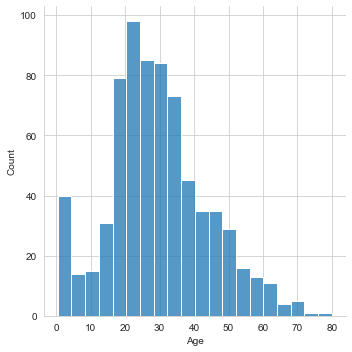

In [9]:
sns.displot(df["Age"].dropna(),kde=False,bins=20)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

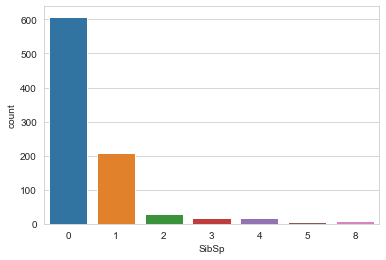

In [10]:
sns.countplot(x='SibSp',data=df)

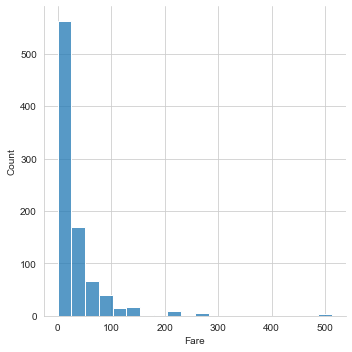

In [11]:
sns.displot(df["Fare"],bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

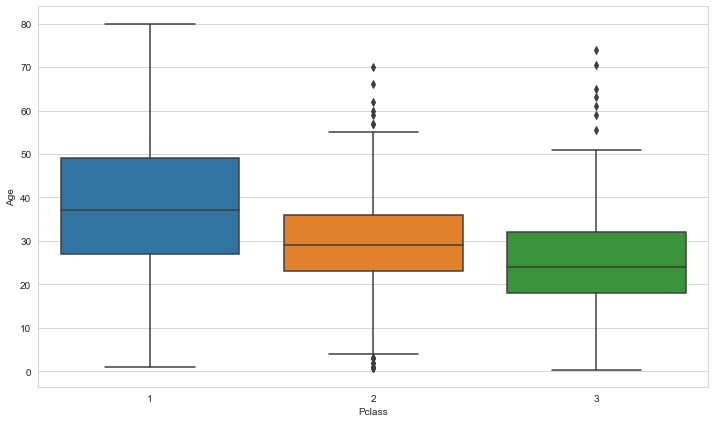

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df)

### Percentage of missng values in each columns

In [13]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
df['Age']=df[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

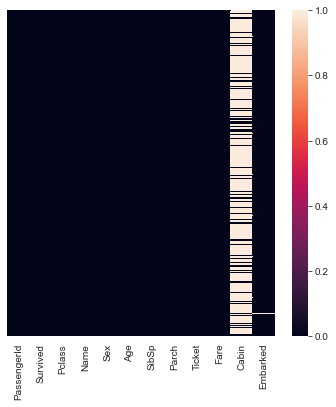

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [16]:
df.drop("Cabin",axis=1,inplace=True)

In [17]:
pd.get_dummies(df["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Embarked=pd.get_dummies(df["Embarked"],drop_first=True)
df.drop(['Sex','Name','Embarked','Name','Ticket'],axis=1,inplace=True)


In [19]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [20]:
train=pd.concat([df,Sex,Embarked],axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Bulding Model Logistic Regression

In [22]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [23]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
md=LogisticRegression(solver='lbfgs', max_iter=1000)
md.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
predection=md.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
accuracy= confusion_matrix(y_test,predection)

In [30]:
accuracy

array([[134,  20],
       [ 37,  77]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predection)
accuracy

0.7873134328358209

In [32]:
print(x_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  male  Q  S
520          521       1  30.0      0      0   93.5000     0  0  1
510          511       3  29.0      0      0    7.7500     1  1  0
446          447       2  13.0      0      1   19.5000     0  0  1
2              3       3  26.0      0      0    7.9250     0  0  1
691          692       3   4.0      0      1   13.4167     0  0  0
..           ...     ...   ...    ...    ...       ...   ... .. ..
575          576       3  19.0      0      0   14.5000     1  0  1
838          839       3  32.0      0      0   56.4958     1  0  1
337          338       1  41.0      0      0  134.5000     0  0  0
523          524       1  44.0      0      1   57.9792     0  0  0
863          864       3  24.0      8      2   69.5500     0  0  1

[623 rows x 9 columns]


## Predection using test.csv

In [33]:
df1=pd.read_csv("Test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
df1['Age']=df1[['Age','Pclass']].apply(input_age,axis=1)

In [36]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
df1.drop("Cabin",axis=1,inplace=True)

In [38]:
df1.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [39]:
dtale.show(df1)

In [40]:
pd.get_dummies(df1["Embarked"],drop_first=True).head()
Sex1=pd.get_dummies(df1["Sex"],drop_first=True)
Embarked1=pd.get_dummies(df1["Embarked"],drop_first=True)
df1.drop(['Sex','Name','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
df1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [42]:
train1=pd.concat([df1,Sex1,Embarked1],axis=1)
train1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [44]:
train1 = np.nan_to_num(train1)
predection=md.predict(train1)


In [45]:
predection

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [48]:
print(type(predection))
np.savetxt("predection.csv", predection, delimiter=",")

<class 'numpy.ndarray'>
